<a href="https://colab.research.google.com/github/manaswitasolanki/leaf-disease-detection/blob/main/plant_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PLANT DISEASE PREDICTION USING IMAGES OF HEALTHY AND UNHEALTHY LEAVES**


---

DATASET : '*plant_village*' from Github
         ( link:https://github.com/spMohanty/PlantVillage-Dataset)
This dataset has more than 50,000 images of plant leaves divided into 38 categories. 

To classify the images we will use a Convolution Neural Network.
(It basically contains layers just like an ANN but it uses techniques like applyling filters , max pooling ( reducing the input layer size) , flattening etc.) 


The PlantVillage dataset consists of 54303 healthy and unhealthy leaf images divided into 38 categories by species and disease.

First we will load the dataset from Github 


In [1]:
#importing the libraries we need to download the dataset
import zipfile
import os

In [2]:
#downloading dataset from github  repository we will save it in tmp folder
!wget --no-check-certificate \
    "https://github.com/spMohanty/PlantVillage-Dataset/archive/refs/heads/master.zip" \
    -O "/tmp/plant-village.zip"

--2022-08-05 19:36:58--  https://github.com/spMohanty/PlantVillage-Dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/spMohanty/PlantVillage-Dataset/zip/refs/heads/master [following]
--2022-08-05 19:36:58--  https://codeload.github.com/spMohanty/PlantVillage-Dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/plant-village.zip’

/tmp/plant-village.     [                <=> ]   2.33G  37.4MB/s    in 78s     

2022-08-05 19:38:17 (30.5 MB/s) - ‘/tmp/plant-village.zip’ saved [2503721860]



In [3]:
zip_ref = zipfile.ZipFile('/tmp/plant-village.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

After discovering about ways of implementing CNN , I found Keras very interesting and easy :D but after several errors I realized that unlike other techniques, Keras only works if your input is in the form of a numpy array 
It took me a very long time to pre-process the data because of my beginner knowledge in python.

In [4]:
import cv2    #we will use it to preprocess the dataset
import numpy as np   #used for mathematical functions like matrices

We will set the height and width of the image to 128 . CNN works better if the size of the input images are the same (we can also apply padding but I felt that will use additional memory)
The number of channels are nothing but the depth of the image - I am using RGB which has a depth of 3 (greyscale has 1 etc.)

In [5]:
img_rows=128 #no.of rows in an image
img_cols=128  #no.of columns in an image
num_channel=3 # no. of channels (rgb)

Initially found it difficult to know where the files are located on colab but I soon discovered about the os library and now can directly select folders using paths

In [6]:
data_dir_list = os.listdir('/tmp/PlantVillage-Dataset-master/raw/color') #the path where the dataset is stored

As we know that the plant village dataset has 38 categories we will specify the number of classes as 38
We will use a dictionary to assign values to the different classes
We will create empty numpy arrays for the images and the labels

In [7]:
num_classes = 38
labels_name={'Apple___Apple_scab':0,
             'Apple___Black_rot':1,
             'Apple___Cedar_apple_rust':2,
             'Apple___healthy':3,
             'Blueberry___healthy':4,
             'Cherry_(including_sour)___Powdery_mildew':5,
             'Cherry_(including_sour)___healthy':6,
             'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot':7,
             'Corn_(maize)___Common_rust_':8,
             'Corn_(maize)___Northern_Leaf_Blight':9,
             'Corn_(maize)___healthy':10,
             'Grape___Black_rot':11,
             'Grape___Esca_(Black_Measles)':12,
             'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)':13,
             'Grape___healthy':14,
             'Orange___Haunglongbing_(Citrus_greening)':15,
             'Peach___Bacterial_spot':16,
             'Peach___healthy':17,
             'Pepper,_bell___Bacterial_spot':18,
             'Pepper,_bell___healthy':19,
             'Potato___Early_blight':20,
             'Potato___Late_blight':21,
             'Potato___healthy':22,
             'Raspberry___healthy':23,
             'Soybean___healthy':24,
             'Squash___Powdery_mildew':25,
             'Strawberry___Leaf_scorch':26,
             'Strawberry___healthy':27,
             'Tomato___Bacterial_spot':28,
             'Tomato___Early_blight':29,
             'Tomato___Late_blight':30,
             'Tomato___Leaf_Mold':31,
             'Tomato___Septoria_leaf_spot':32,
             'Tomato___Spider_mites Two-spotted_spider_mite':33,
             'Tomato___Target_Spot':34,
             'Tomato___Tomato_Yellow_Leaf_Curl_Virus':35,
             'Tomato___Tomato_mosaic_virus':36,
             'Tomato___healthy':37,
             
             }
img_data_list=[]  #an array containing all the images
labels_list = []  #an array containing all the labels/classes

We are creating a nested for loop , the first one loops through the entire directory(I have selected the color folder as it had all the rgb images) and selects the 38 different datasets .The label is also added using the dictionary we made earlier.
The second for loop runs through each label and reads each the image files using imread , resizes each image into the height and width we want , appends each image to the image array , the label is also appended to the label array

While running the code the limit of 12GB RAM surpassed and I had to reduce the number of images in each label to 250

In [8]:

		
for dataset in data_dir_list:
	img_list=os.listdir('/tmp/PlantVillage-Dataset-master/raw/color'+'/'+ dataset)
	print ('Loading the images of dataset-'+'{}\n'.format(dataset))
	label = labels_name[dataset]
	for img in img_list[:250]:
		input_img=cv2.imread('/tmp/PlantVillage-Dataset-master/raw/color' + '/'+ dataset + '/'+ img )
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)
		labels_list.append(label)


Loading the images of dataset-Pepper,_bell___Bacterial_spot

Loading the images of dataset-Peach___Bacterial_spot

Loading the images of dataset-Tomato___Bacterial_spot

Loading the images of dataset-Tomato___Tomato_Yellow_Leaf_Curl_Virus

Loading the images of dataset-Grape___Black_rot

Loading the images of dataset-Grape___healthy

Loading the images of dataset-Apple___Black_rot

Loading the images of dataset-Pepper,_bell___healthy

Loading the images of dataset-Tomato___Late_blight

Loading the images of dataset-Cherry_(including_sour)___healthy

Loading the images of dataset-Tomato___healthy

Loading the images of dataset-Grape___Leaf_blight_(Isariopsis_Leaf_Spot)

Loading the images of dataset-Strawberry___Leaf_scorch

Loading the images of dataset-Tomato___Tomato_mosaic_virus

Loading the images of dataset-Tomato___Leaf_Mold

Loading the images of dataset-Potato___Early_blight

Loading the images of dataset-Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot

Loading the images of

img_data now contains all the images in array form , we set the type of each element as float 

In [9]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')


Each value would be in a range of 0 to 255 which will take a lot of computation time so we will divide each value by 255 to make it in a range of 0 to 1 

In [10]:
img_data /= 255  #normalizing the data so that the value is less than 1 -fast computation

To check how many images are there

In [11]:
print (img_data.shape)  #total 9000 images ,it was 50000 earlier but ram stopped owking to reduced it

(9402, 128, 128, 3)


To check how many images we have in each label

In [12]:
labels = np.array(labels_list)
print(np.unique(labels,return_counts=True))  #shows that 250 images are taken from each class

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37]), array([250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
       250, 250, 250, 250, 250, 250, 250, 250, 250, 152, 250, 250, 250,
       250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]))


We will use scikit learn to do a train test split
The test size is 0.2 which is 20 percent of the data ,80 percent will be used for training

In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [14]:
Y = np_utils.to_categorical(labels, num_classes)
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Checking the shapes as it is very important for the X_train and y_train to have the same examples .
We are using one hot encoding which basically means each element in the array will represent one label (38 elements here) and if the image belongs to a label the corresponding element is 1 the rest are 0s
We can see that by printing the first 5 elements of y_train

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[:5])


(7521, 128, 128, 3)
(1881, 128, 128, 3)
(7521, 38)
(1881, 38)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Now begins the the most important part 
To make the model using CNN we will first import the needed libraries 

In [15]:
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import Sequential
#from keras.layers.core import Dense, Activation, Flatten


We will use 3 layers for our model 

Input layer : We will perform the convolution operation first by using 32 filters each of the size 3x3 .The activation function we use will be ReLu as it ignores the pixels with negative values and only considers the important ones. Max pooling basically reduces the input size and here we will take a stride of 2 

Hidden layer: It is the same as input layer but it has more filters 

Output layer:We will flatten our output (make it 1D) and put it as an input to this layer .The final layer should have the same size as the number of classes .We will use softmax now as it gives us a normalized probability distribution of so we can predict classes better especially if we have many classes.

In [16]:
#define the model


cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
    
])



We will compile all the layers .Categorical crossentropy is used as we have more than two categories. Adam optimizer is faster so we will use that.

In [19]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Checking out how the shapes of the input and output will be in each layer

In [17]:
cnn.summary()
cnn.get_config()
cnn.layers[0].get_config()
cnn.layers[0].input_shape			
cnn.layers[0].output_shape			
cnn.layers[0].get_weights()
np.shape(cnn.layers[0].get_weights()[0])
cnn.layers[0].trainable

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

True

Finally training the model . It took around 30 mins for this to run.A higher batch size will take less time but the accuracy will be lower so went with 16

In [20]:
h = cnn.fit(X_train, y_train, batch_size=16, epochs=8, verbose=1, validation_data=(X_test, y_test))

Epoch 1/8
471/471 [==============================] - 187s 395ms/step - loss: 2.3372 - accuracy: 0.3523 - val_loss: 1.5224 - val_accuracy: 0.5593
Epoch 2/8
471/471 [==============================] - 199s 423ms/step - loss: 1.0612 - accuracy: 0.6863 - val_loss: 1.1610 - val_accuracy: 0.6571
Epoch 3/8
471/471 [==============================] - 187s 398ms/step - loss: 0.5721 - accuracy: 0.8200 - val_loss: 0.9907 - val_accuracy: 0.7119
Epoch 4/8
471/471 [==============================] - 194s 412ms/step - loss: 0.2778 - accuracy: 0.9160 - val_loss: 1.0143 - val_accuracy: 0.7294
Epoch 5/8
471/471 [==============================] - 191s 406ms/step - loss: 0.1492 - accuracy: 0.9532 - val_loss: 1.3185 - val_accuracy: 0.7028
Epoch 6/8
471/471 [==============================] - 195s 413ms/step - loss: 0.1042 - accuracy: 0.9680 - val_loss: 1.3383 - val_accuracy: 0.7033
Epoch 7/8
471/471 [==============================] - 196s 416ms/step - loss: 0.0820 - accuracy: 0.9751 - val_loss: 2.1801 - val_ac

The average accuracy is 66 percent 

In [21]:
cnn.evaluate(X_test,y_test)

59/59 [==============================] - 11s 184ms/step - loss: 1.6498 - accuracy: 0.6661


[1.6497862339019775, 0.6661350131034851]

This graph is important to know how to accuracy changes according to the number of epochs. If accuracy starts going down after a certian epoch number we can stop trying further.

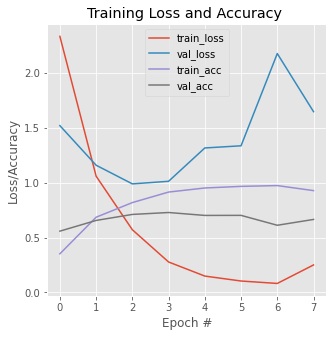

In [50]:
import matplotlib.pyplot as plt 
N = np.arange(0, 8)
plt.style.use("ggplot")
plt.figure(figsize=(5,5))
plt.plot(N, h.history["loss"], label="train_loss")
plt.plot(N, h.history["val_loss"], label="val_loss")
plt.plot(N, h.history["accuracy"], label="train_acc")
plt.plot(N, h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy ")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


We will make the prediction and print the first 5 outputs 

In [51]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.52180121e-04, 1.52050266e-08, 8.47401917e-01, 5.98680481e-06,
        4.47145290e-08, 1.49403393e-01, 2.73078354e-06, 1.73161284e-03,
        4.27286177e-05, 1.50704247e-04, 1.04739641e-07, 1.66687229e-07,
        7.92360677e-10, 2.78491962e-06, 2.51248444e-09, 1.48747540e-05,
        2.07813835e-04, 1.50358936e-14, 1.24725403e-07, 2.04729353e-08,
        2.58925459e-09, 4.04006983e-07, 1.98862506e-11, 8.42289960e-10,
        2.23702001e-10, 3.89660418e-05, 1.40998452e-06, 2.56421089e-08,
        8.33669183e-05, 2.79075664e-07, 4.58047543e-05, 2.32065005e-07,
        5.14798603e-06, 6.71082287e-11, 1.50063928e-09, 6.20026185e-07,
        1.36854029e-14, 6.53962297e-06],
       [2.26619033e-21, 1.29825433e-29, 8.23495264e-20, 9.01493582e-22,
        1.43161183e-25, 1.81407854e-13, 1.04618473e-23, 6.33259196e-16,
        2.54010623e-20, 1.01731882e-20, 1.39174150e-27, 4.49620759e-15,
        2.48921272e-10, 9.99999404e-01, 1.39376007e-20, 2.65407588e-15,
        1.47602712e-15,

The label with the highest value will be the predicted one, using argmax we get the following labels for the first 5 examples

In [52]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5] #the classes we get as prediction

[2, 13, 1, 36, 14]

These are the actual labels of the examples .These are difficult to view in one hot encoding 

In [53]:
y_test[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

The predictions are accurate :))

In [54]:
y_actual_classes=[np.argmax(element) for element in y_test]
print(y_actual_classes[:5])

[2, 13, 1, 36, 14]


Classification report

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False.
Precision is how accurate the true predictions are.
Recall tells us the percentage of positive predictions we got out of all positive predictions.
F1 takes both into consideration
Support is the number of actual occurances of a class in the dataset

In [55]:
from sklearn.metrics import classification_report,confusion_matrix
#import itertools

target_names = ['Apple___Apple_scab',
             'Apple___Black_rot',
             'Apple___Cedar_apple_rust',
             'Apple___healthy',
             'Blueberry___healthy',
             'Cherry_(including_sour)___Powdery_mildew',
             'Cherry_(including_sour)___healthy',
             'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
             'Corn_(maize)___Common_rust_',
             'Corn_(maize)___Northern_Leaf_Blight',
             'Corn_(maize)___healthy',
             'Grape___Black_rot',
             'Grape___Esca_(Black_Measles)',
             'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
             'Grape___healthy',
             'Orange___Haunglongbing_(Citrus_greening)',
             'Peach___Bacterial_spot',
             'Peach___healthy',
             'Pepper,_bell___Bacterial_spot',
             'Pepper,_bell___healthy',
             'Potato___Early_blight',
             'Potato___Late_blight',
             'Potato___healthy',
             'Raspberry___healthy',
             'Soybean___healthy',
             'Squash___Powdery_mildew',
             'Strawberry___Leaf_scorch',
             'Strawberry___healthy',
             'Tomato___Bacterial_spot',
             'Tomato___Early_blight',
             'Tomato___Late_blight',
             'Tomato___Leaf_Mold',
             'Tomato___Septoria_leaf_spot',
             'Tomato___Spider_mites Two-spotted_spider_mite',
             'Tomato___Target_Spot',
             'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
             'Tomato___Tomato_mosaic_virus',
             'Tomato___healthy']
					

print(classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1), target_names=target_names))



                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.64      0.62      0.63        61
                                 Apple___Black_rot       0.70      0.81      0.75        48
                          Apple___Cedar_apple_rust       0.52      0.81      0.63        54
                                   Apple___healthy       0.67      0.58      0.63        60
                               Blueberry___healthy       0.80      0.54      0.64        52
          Cherry_(including_sour)___Powdery_mildew       0.54      0.73      0.62        56
                 Cherry_(including_sour)___healthy       0.74      0.80      0.77        44
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.61      0.83      0.70        48
                       Corn_(maize)___Common_rust_       1.00      0.95      0.98        43
               Corn_(maize)___Northern_Leaf_Blight       0.58      0.67      0.

Confusion matrix
It helps us the visualize the accuracy .
Let's see the first row ,according to this there were 38 instances where the 1st label was correctly predicted true. 
The value 0 means the labels were correctly predicted false

In [56]:
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[38  2  3 ...  0  1  0]
 [ 5 39  0 ...  0  0  0]
 [ 0  0 44 ...  1  0  1]
 ...
 [ 0  0  2 ... 42  0  0]
 [ 0  0  0 ...  2 46  0]
 [ 0  0  0 ...  0  0 28]]


Heatmap
A heatmap is the graphical representation of the confusion matrix , the darker regions have accurate True predictions and the zeros have accurate False predictions

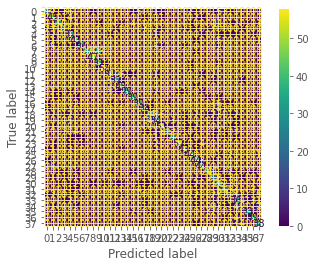

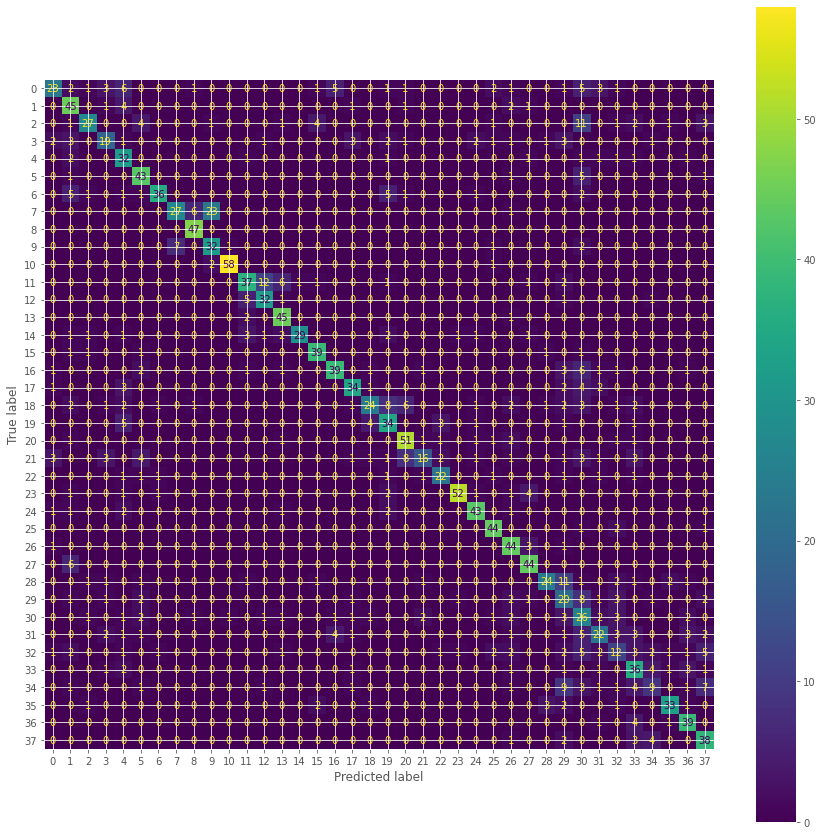

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
#disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=target_names)
cmp =ConfusionMatrixDisplay.from_predictions( y_test.argmax(axis=1), y_pred.argmax(axis=1))
#disp.plot()
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax)

#plot_confusion_matrix(confusion_matrix=confusion_matrix, class_names=target_names, errors_only=False, fontsize=10)

Let us test our model on an example image
I have already uploaded my image on colab. It's a random leaf from the internet
We are doing the same steps as before for pre - processing

In [57]:
test_image = cv2.imread('/content/example.jpg')
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
test_image = test_image.reshape((1,) + test_image.shape)  
print (test_image.shape)


(1, 128, 128, 3)


Next we will make a prediction on the image by the cnn model we created

It is predicting that the image is from class 23 

In [58]:
pred=cnn.predict(test_image)
pred = [np.argmax(element) for element in pred]
print(pred)

[23]


Feature map
This is to understand what features of the input are detected or preserved in the feature maps. The expectation would be that the feature maps close to the input detect more detail, whereas feature maps close to the output of the model capture more general features.

We create an array of the outputs of each layer
We will also create a feature map model, taking the input layer and the outputs of each layer

In [43]:
layer_outputs = [layer.output for layer in cnn.layers[1:]]
feature_map_model = tf.keras.models.Model(cnn.input, layer_outputs)

We will use an example image 

In [44]:
test_image = cv2.imread('/content/example.jpg')
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255                        
test_image = test_image.reshape((1,) + test_image.shape)                   
test_image.shape

(1, 128, 128, 3)

In [45]:
feature_maps = feature_map_model.predict(test_image)

In [46]:
layer_names = [layer.name for layer in cnn.layers]

This gives us the information about the shape of each output

In [47]:
for layer_name, feature_map in zip(layer_names, feature_maps):print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the conv2d is =======>> (1, 63, 63, 32)
The shape of the max_pooling2d is =======>> (1, 61, 61, 64)
The shape of the conv2d_1 is =======>> (1, 30, 30, 64)
The shape of the max_pooling2d_1 is =======>> (1, 57600)
The shape of the flatten is =======>> (1, 64)
The shape of the dense is =======>> (1, 38)


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

(1, 63, 63, 32)
(1, 61, 61, 64)
(1, 30, 30, 64)
(1, 57600)
(1, 64)
(1, 38)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


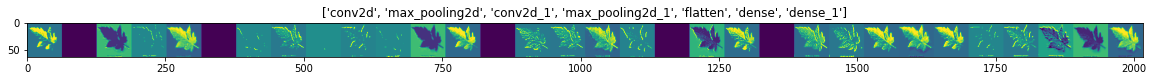

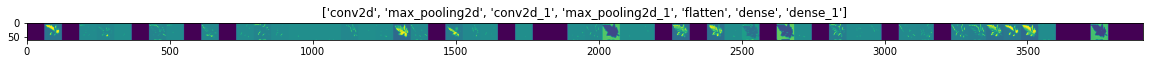

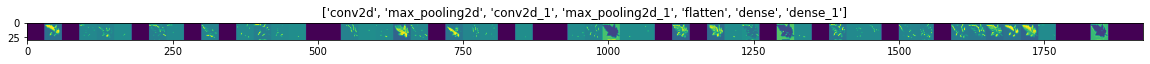

In [49]:
for layer_name, feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



This is the feature map of all the three convolution layers. 